# Correlation

Shows the correlation between certain call data attributes and bike traffic

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics

## Load the data

In [110]:
def output_dir(filename = ''):
    return os.path.join('data', 'cleaned', filename)

f_bikes_file = output_dir('fremont_bikes.csv')
g_bikes_file = output_dir('greenway_bikes.csv')

f_calls_file = output_dir('resampled_fremont_calls.csv')
g_calls_file = output_dir('resampled_greenway_calls.csv')

In [111]:
# Read in the bike traffic data
f_bikes = pd.read_csv(f_bikes_file)
g_bikes = pd.read_csv(g_bikes_file)

In [112]:
# Read in the resampled call data
f_calls = pd.read_csv(f_calls_file)
g_calls = pd.read_csv(g_calls_file)

## Parse dates and times

In [113]:
# Parse dates and times for the traffic data
f_bikes['date'] = pd.to_datetime(f_bikes['date'], format = '%Y-%m-%d')
g_bikes['date'] = pd.to_datetime(g_bikes['date'], format = '%Y-%m-%d')

In [114]:
f_bikes['time'] = pd.to_datetime(f_bikes['time'], format = '%H:%M:%S')
g_bikes['time'] = pd.to_datetime(g_bikes['time'], format = '%H:%M:%S')

In [115]:
# Parse dates/times for call data
f_calls['hour'] = pd.to_datetime(f_calls['hour'], format = '%Y-%m-%d %H:%M:%S')
g_calls['hour'] = pd.to_datetime(g_calls['hour'], format = '%Y-%m-%d %H:%M:%S')

## Merge Data

In [116]:
f_bikes['date_time'] = pd.to_datetime(f_bikes['date'].dt.strftime('%Y-%m-%d') + ' ' + f_bikes['time'].dt.strftime('%H:%M:%S'))

In [117]:
# Merge the traffic data and call data by hour
f_merge = pd.merge(f_calls, f_bikes, left_on = 'hour', right_on = 'date_time')
# Drop all the columns we're not interested in keeping
f_merge = f_merge.drop(['date', 'time', 'date_time', 'call_types', 'initial_call_type', 'final_call_types', 'clearance_desc', 'average_arrived_delay'], axis = 1)

In [118]:
g_bikes['date_time'] = pd.to_datetime(g_bikes['date'].dt.strftime('%Y-%m-%d') + ' ' + g_bikes['time'].dt.strftime('%H:%M:%S'))

In [119]:
# Merge the traffic data and call data by hour
g_merge = pd.merge(g_calls, g_bikes, left_on = 'hour', right_on = 'date_time')
# Drop all the columns we're not interested in keeping
g_merge = g_merge.drop(['date', 'time', 'date_time', 'call_types', 'initial_call_type', 'final_call_types', 'clearance_desc', 'average_arrived_delay'], axis = 1)

In [120]:
f_merge.head()

,hour,average_priority,call_count,total,east,west
0,2012-10-03 00:00:00,4.500000,2,13.0,4.0,9.0
1,2012-10-03 01:00:00,1.000000,1,10.0,4.0,6.0
2,2012-10-03 02:00:00,7.000000,2,2.0,1.0,1.0
3,2012-10-03 03:00:00,5.500000,2,5.0,2.0,3.0
4,2012-10-03 04:00:00,3.666667,3,7.0,6.0,1.0


## Droping rows with NaN or inf

In [121]:
f_merge = f_merge.replace([np.inf, -np.inf], np.nan).dropna()

g_merge = g_merge.replace([np.inf, -np.inf], np.nan).dropna()

## Plots

Series of plots to see if any of them are of interest for project.

## Pair Plot

In [122]:
# Extract relevant columns for pair plot
pair_plot_columns_fremont = ['total', 'call_count']
pair_plot_columns_greenway = ['total', 'call_count']

C:\Users\nguye\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


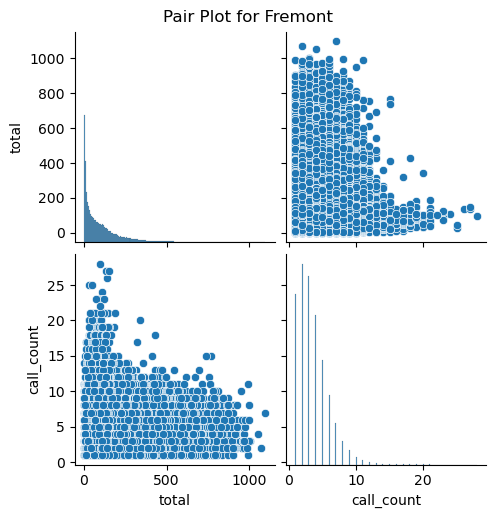

C:\Users\nguye\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


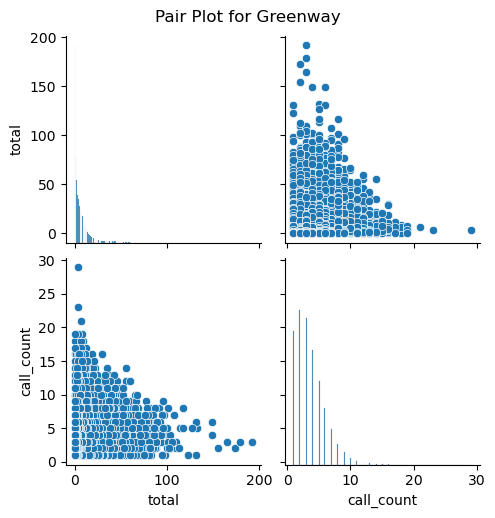

In [123]:
# Pair plot for Fremont
sns.pairplot(f_merge[pair_plot_columns_fremont])
plt.suptitle('Pair Plot for Fremont', y=1.02)
plt.show()

# Pair plot for Greenway
sns.pairplot(g_merge[pair_plot_columns_greenway])
plt.suptitle('Pair Plot for Greenway', y=1.02)
plt.show()

## Time Series

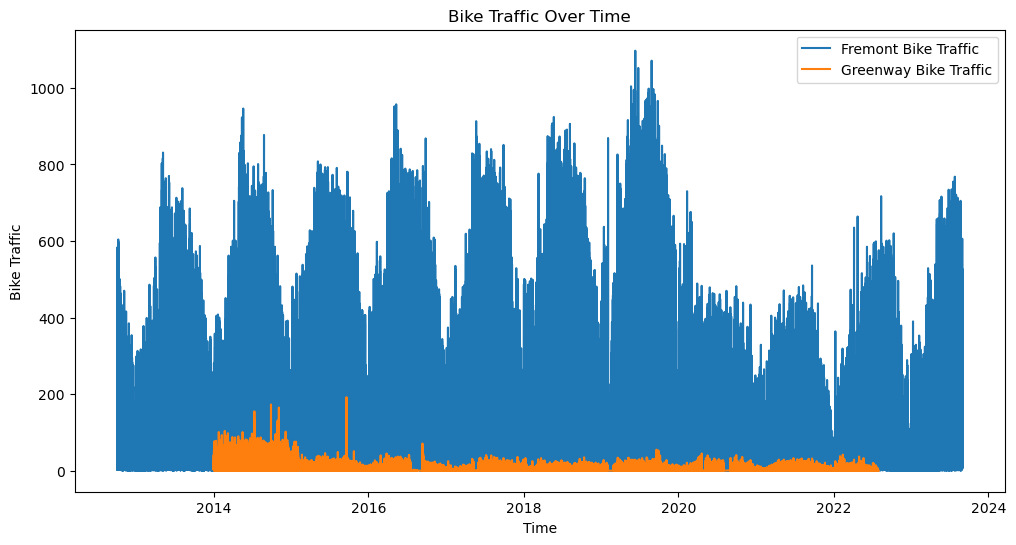

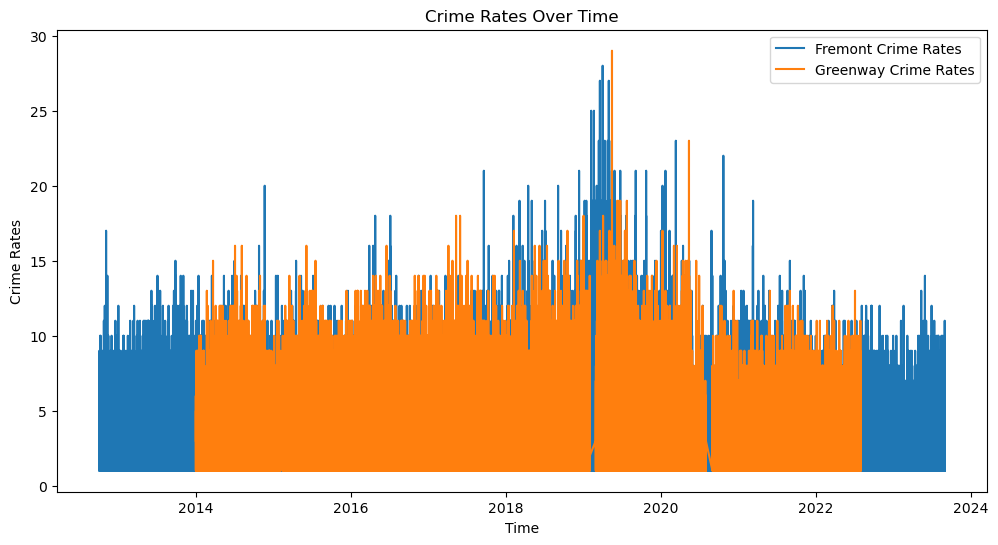

In [124]:
# Time series plot for bike traffic
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='total', data=f_merge, label='Fremont Bike Traffic')
sns.lineplot(x='hour', y='total', data=g_merge, label='Greenway Bike Traffic')
plt.title('Bike Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Bike Traffic')
plt.legend()
plt.show()

# Time series plot for crime rates
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='call_count', data=f_merge, label='Fremont Crime Rates')
sns.lineplot(x='hour', y='call_count', data=g_merge, label='Greenway Crime Rates')
plt.title('Crime Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Crime Rates')
plt.legend()
plt.show()

## Scatterplot

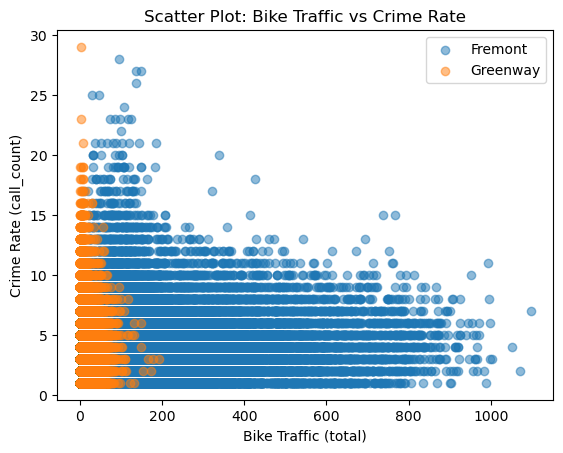

In [125]:
# Scatter plot
plt.scatter(f_merge['total'], f_merge['call_count'], alpha=0.5, label='Fremont')
plt.scatter(g_merge['total'], g_merge['call_count'], alpha=0.5, label='Greenway')

# Set labels and title
plt.xlabel('Bike Traffic (total)')
plt.ylabel('Crime Rate (call_count)')
plt.title('Scatter Plot: Bike Traffic vs Crime Rate')
plt.legend()

# Show the plot
plt.show()

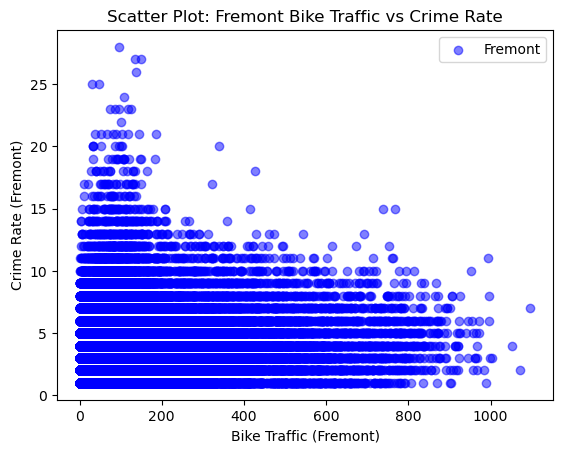

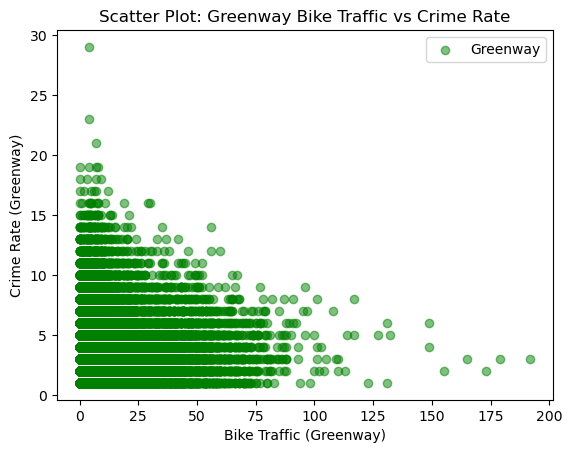

In [126]:
# Scatter plot for f_merge
plt.scatter(f_merge['total'], f_merge['call_count'], alpha=0.5, label='Fremont', color='blue')
plt.xlabel('Bike Traffic (Fremont)')
plt.ylabel('Crime Rate (Fremont)')
plt.title('Scatter Plot: Fremont Bike Traffic vs Crime Rate')
plt.legend()
plt.show()

# Scatter plot for g_merge
plt.scatter(g_merge['total'], g_merge['call_count'], alpha=0.5, label='Greenway', color='green')
plt.xlabel('Bike Traffic (Greenway)')
plt.ylabel('Crime Rate (Greenway)')
plt.title('Scatter Plot: Greenway Bike Traffic vs Crime Rate')
plt.legend()
plt.show()


## Simple Linear Regression

In [127]:
X_f = sm.add_constant(f_merge['total'])  # Add a constant term to the predictor
y_f = f_merge['call_count']

model_f = sm.OLS(y_f, X_f).fit()

# Print regression summary
print(model_f.summary())

                            OLS Regression Results                            
Dep. Variable:             call_count   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2188.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:24:33   Log-Likelihood:            -1.9612e+05
No. Observations:               87955   AIC:                         3.922e+05
Df Residuals:                   87953   BIC:                         3.923e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2868      0.010    335.047      0.0

In [128]:
X_g = sm.add_constant(g_merge['total'])  # Add a constant term to the predictor
y_g = g_merge['call_count']

model_g = sm.OLS(y_g, X_g).fit()

# Print regression summary
print(model_g.summary())

                            OLS Regression Results                            
Dep. Variable:             call_count   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     538.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.27e-118
Time:                        10:24:33   Log-Likelihood:            -1.4954e+05
No. Observations:               66980   AIC:                         2.991e+05
Df Residuals:                   66978   BIC:                         2.991e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4851      0.010    335.520      0.0

## Residual Analysis for regression model above

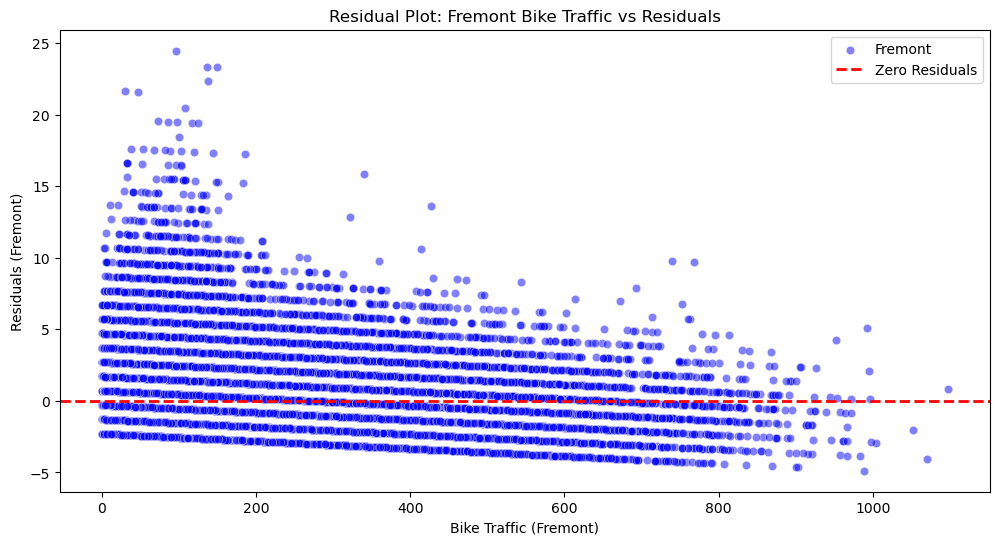

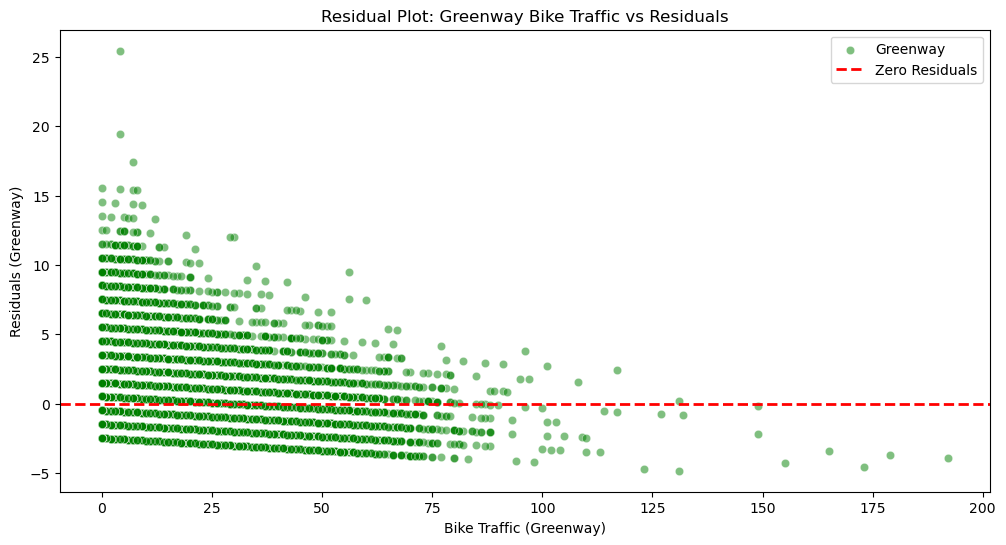

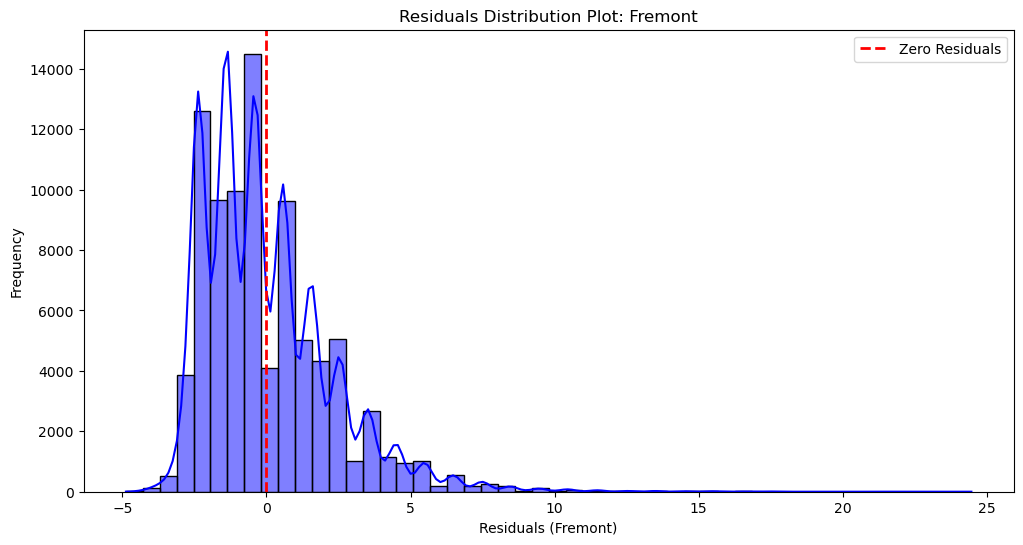

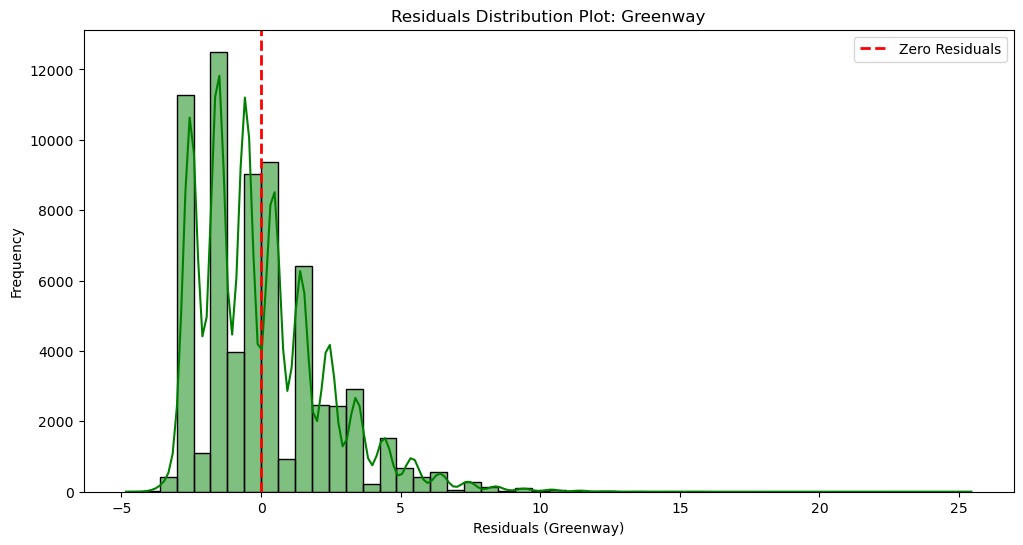

In [129]:
# Get predicted values
y_pred_f = model_f.predict(X_f)
y_pred_g = model_g.predict(X_g)

# Calculate residuals
residuals_f = y_f - y_pred_f
residuals_g = y_g - y_pred_g

# Residual Plot for Fremont
plt.figure(figsize=(12, 6))
sns.scatterplot(x=f_merge['total'], y=residuals_f, alpha=0.5, label='Fremont', color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Bike Traffic (Fremont)')
plt.ylabel('Residuals (Fremont)')
plt.title('Residual Plot: Fremont Bike Traffic vs Residuals')
plt.legend()
plt.show()

# Residual Plot for Greenway
plt.figure(figsize=(12, 6))
sns.scatterplot(x=g_merge['total'], y=residuals_g, alpha=0.5, label='Greenway', color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Bike Traffic (Greenway)')
plt.ylabel('Residuals (Greenway)')
plt.title('Residual Plot: Greenway Bike Traffic vs Residuals')
plt.legend()
plt.show()

# Residuals Distribution Plot for Fremont
plt.figure(figsize=(12, 6))
sns.histplot(residuals_f, bins=50, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Residuals (Fremont)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution Plot: Fremont')
plt.legend()
plt.show()

# Residuals Distribution Plot for Greenway
plt.figure(figsize=(12, 6))
sns.histplot(residuals_g, bins=50, kde=True, color='green')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Residuals (Greenway)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution Plot: Greenway')
plt.legend()
plt.show()